In [1]:
pip install plotly.express

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
#from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV#,\
#cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler#, OneHotEncoder 
from sklearn.pipeline import Pipeline
#from sklearn.compose import ColumnTransformer

#from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix,\
accuracy_score, f1_score, recall_score, precision_score, plot_roc_curve

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
#from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.ensemble import RandomForestClassifier
import xgboost


import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 110)

In [4]:
df = pd.read_csv('../data/speed_dating_data.csv')

# Insights

Distribution of age groups with an average age of 26.


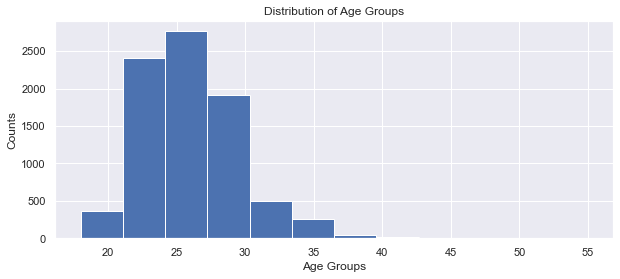

In [67]:
sns.set()
fig, ax = plt.subplots(figsize = (10, 4))

ax.hist(df['age_o'],
        bins = 12)

ax.set_title('Distribution of Age Groups')
ax.set_xlabel('Age Groups')
ax.set_ylabel('Counts');

mean_age = round(df['age_o'].mean())
print(f'Distribution of age groups with an average age of {mean_age}.')

# Data Cleaning

In [69]:
len(df)

8378

In [25]:
df_clean.iloc[six_nine_index].shape, df_clean.iloc[six_nine_index].isna().sum()

((1562, 77),
 dec            0
 wave           0
 int_corr      10
 samerace       0
 age_o          0
 race_o         0
 pf_o_att       0
 pf_o_sin       0
 pf_o_int       0
 pf_o_fun       0
 pf_o_amb       0
 pf_o_sha       0
 attr_o         0
 sinc_o         0
 intel_o        0
 fun_o          0
 amb_o          0
 shar_o         0
 like_o         0
 prob_o         0
 met_o          0
 age            5
 field_cd       5
 race           5
 imprace        5
 imprelig       5
 goal           5
 date           5
 go_out         5
 sports         5
 tvsports       5
 exercise       5
 dining         5
 museums        5
 art            5
 hiking         5
 gaming         5
 clubbing       5
 reading        5
 tv             5
 theater        5
 movies         5
 concerts       5
 music          5
 shopping       5
 yoga           5
 exphappy       5
 attr1_1        5
 sinc1_1        5
 intel1_1       5
 fun1_1         5
 amb1_1         5
 shar1_1        5
 attr4_1        5
 sinc4_1       

In [49]:
df_clean.iloc[other_index].shape, df_clean.iloc[other_index].isna().sum()

((6816, 77),
 dec            0
 wave           0
 int_corr     148
 samerace       0
 age_o          0
 race_o         0
 pf_o_att       0
 pf_o_sin       0
 pf_o_int       0
 pf_o_fun       0
 pf_o_amb       0
 pf_o_sha       0
 attr_o         0
 sinc_o         0
 intel_o        0
 fun_o          0
 amb_o          0
 shar_o         0
 like_o         0
 prob_o         0
 met_o          0
 age           90
 field_cd      77
 race          58
 imprace       74
 imprelig      74
 goal          74
 date          92
 go_out        74
 sports        74
 tvsports      74
 exercise      74
 dining        74
 museums       74
 art           74
 hiking        74
 gaming        74
 clubbing      74
 reading       74
 tv            74
 theater       74
 movies        74
 concerts      74
 music         74
 shopping      74
 yoga          74
 exphappy      96
 attr1_1       74
 sinc1_1       74
 intel1_1      74
 fun1_1        84
 amb1_1        94
 shar1_1      116
 attr4_1     1884
 sinc4_1     18

In [51]:
df_clean.groupby('wave')

In [5]:
#Select only columns with information prior and during speed date
df_clean = df.loc[:,'iid':'match_es']

#Drop column contain individual dating decision
df_clean.drop(columns = ['dec_o', 'match'], inplace = True)

#List of survey columns
columns = df_clean.loc[:,'attr1_1':'amb5_1'].columns.tolist()

#Fill NaN values in survey columns with mean of wave's scale
waves_six_nine = list(range(6,10))
six_nine_index = df_clean[df_clean['wave'].isin(waves_six_nine)].index.tolist()
waves_other = [*list(range(1,6)), *list(range(10, 22))]
other_index = df_clean[df_clean['wave'].isin(waves_other)].index.tolist()
for col in columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

#List of partner ratings
partner_columns = df_clean.loc[:,'age_o':'prob_o'].columns.tolist()
for col in partner_columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

#Drop exp num due to large majority NaN values
df_clean.drop(columns = 'expnum', inplace = True)

#Drop additional columns
df_clean.drop(columns = ['iid', 'id', 'idg', 'position', 'positin1', 'partner', 'pid',
                         'field', 'mn_sat', 'tuition', 'income', 'undergra', 'condtn', 'gender'], inplace = True)

#Low correlation even when dummied, no change in base model
df_clean.drop(columns = 'career_c', inplace = True)

#Dummy met column
df_clean['met'] = np.where(df_clean['met'] == 2 , 1, 0)
df_clean['met_o'] = np.where(df_clean['met_o'] == 2 , 1, 0)

#Fill match_es NaN's as 0
df_clean['match_es'] =  df_clean['match_es'].fillna(0)

survey_columns = df.loc[:,'attr':'prob'].columns.tolist()
#for col in survey_columns:
#    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())
df_clean.drop(columns = survey_columns, inplace = True)

df_clean.drop(columns = ['zipcode', 'career', 'from', 'round', 'order'], inplace = True)

df_clean.drop(columns = ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'], inplace = True)

df_clean.dropna(inplace = True)



#Reassign dec as first column
first_column = df_clean.pop('dec')
df_clean.insert(0, 'dec', first_column)

#Reset index
#df_clean.reset_index(drop = True, inplace = True)

In [55]:
df_clean.isna().sum()

dec            0
wave           0
int_corr     158
samerace       0
age_o          0
race_o         0
pf_o_att       0
pf_o_sin       0
pf_o_int       0
pf_o_fun       0
pf_o_amb       0
pf_o_sha       0
attr_o         0
sinc_o         0
intel_o        0
fun_o          0
amb_o          0
shar_o         0
like_o         0
prob_o         0
met_o          0
age           95
field_cd      82
race          63
imprace       79
imprelig      79
goal          79
date          97
go_out        79
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
attr4_1     1889
sinc4_1     1889
intel4_1    1889
fun4_1      1889
amb4_1      1889
shar4_1     19

In [679]:
df_clean = df.loc[:,'attr':'prob']
df_clean.insert(0, 'dec', first_column)
df_clean.drop(columns = 'like', inplace = True)
df_clean.dropna(inplace = True)

In [1144]:
df.loc[:,'attr':'prob'].isna().sum()

attr      202
sinc      277
intel     296
fun       350
amb       712
shar     1067
like      240
prob      309
dtype: int64

In [1119]:
df.pop('dec')
df.insert(0, 'dec', first_column)

In [1120]:
df.corr()

,dec,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
dec,1.000000,-0.007431,-0.019743,0.111993,-0.016048,-0.036195,-0.013928,-0.035592,-0.021582,0.003205,-0.029824,0.002538,-0.019269,0.520113,0.016946,0.025534,-0.050220,-0.069323,0.038185,-0.070477,0.004185,0.043234,0.037807,-0.080814,-0.049836,-0.062724,0.080825,0.080908,0.042125,0.064014,0.057302,0.037888,0.152412,-0.066245,0.012201,-0.031189,0.053950,-0.089867,-0.068665,-0.002027,-0.036414,0.041388,-0.040755,-0.025790,0.014952,-0.067150,-0.001603,-0.002655,0.012864,0.012154,0.084235,0.043793,0.033871,0.002490,0.011096,-0.026597,0.022762,-0.000702,-0.030189,0.034228,0.089077,0.114559,-0.023796,0.026471,-0.000889,0.000160,-0.025866,0.040630,-0.030819,-0.005270,0.012403,0.036469,-0.042716,0.030327,-0.067174,0.064970,0.079673,-0.017952,0.033404,0.013788,-0.055584,-0.017307,-0.012025,0.038440,0.002725,-0.072416,-0.015593,0.033312,-0.041101,0.023433,0.487524,0.211711,0.216785,0.415103,0.182457,0.397190,0.512289,0.307107,0.021256,0.225518,-0.013092,-0.009081,-0.014948,-0.009211,-0.035974,0.045386,-0.033509,0.050973,0.043597,-0.040987,0.018819,0.199729,-0.042640,0.006692,-0.140430,0.043824,0.046091,0.095443,0.067529,-0.023763,-0.066524,0.038451,-0.011416,0.048336,0.013817,0.045878,-0.034758,-0.040205,-0.045440,0.040540,-0.016224,0.037517,-0.109264,0.057762,0.117224,0.026545,0.064002,0.008935,-0.063055,-0.004435,0.020802,-0.030650,-0.002241,-0.093972,-0.014589,-0.023800,-0.027727,-0.019784,0.080453,0.076454,0.027747,0.054073,0.150371,-0.035584,-0.000087,-0.007602,0.020088,0.034112,0.015173,-0.079242,0.039000,-0.009886,0.015430,0.036148,0.086327,-0.042777,0.005617,0.006947,-0.026099,-0.011048,-0.019573,-0.045762,-0.010772,0.017374,-0.040879,0.042034,-0.047882,-0.049749,0.013984,0.022911,-0.038485,-0.017456,-0.110357,-0.044052,0.001482,-0.083057,0.028771
iid,-0.007431,1.000000,0.117109,0.051937,0.120362,0.220413,0.996713,0.231881,0.081287,0.070443,0.090696,0.089614,0.992968,-0.015806,0.046937,-0.010643,0.090583,0.065740,0.068138,-0.004136,-0.054760,0.007652,-0.110027,0.000840,-0.015691,-0.028386,-0.043096,-0.042515,-0.006723,-0.026489,-0.050964,-0.044411,0.024480,0.059300,0.101278,0.125793,0.061119,-0.038666,-0.068920,-0.052643,-0.011913,0.019237,0.157115,0.017894,-0.018429,-0.024466,0.101109,0.056246,0.097190,0.011420,0.002196,-0.043975,-0.020893,-0.005751,0.008399,-0.017760,0.050947,0.049501,0.054728,0.008542,0.072613,0.043713,0.104830,-0.019844,-0.064733,0.015018,-0.149789,-0.013030,0.526876,0.186212,0.290768,0.424015,0.130291,0.233665,0.111924,-0.083049,-0.127845,-0.024028,-0.018272,-0.029488,0.032883,0.062763,0.036367,-0.027279,0.065303,0.056811,0.028595,-0.010899,0.10

In [57]:
df_clean

,dec,wave,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,met,match_es
0,1,1,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.00000,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,1,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,26.39436,11.071506,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,4.0
1,1,1,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.00000,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,1,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,26.39436,11.071506,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0,4.0
2,1,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.00000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,26.39436,11.071506,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,0,4.0
3,1,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.00000,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,1,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,26.39436,11.071506,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,4.0
4,1,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.00000,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,1,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,26.39436,11.071506,12.636308,15.566805,9.780089,11.014845,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,21,0.64,0,26.0,3.0,10.0,10.0,30.0,20.0,10.0,15.00000,10.0,5.0,3.0,2.0,6.0,5.0,6.0,1.0,0,25.0,18.0,2.0,1.0,1.0,1.0,2.0,1.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,90.00000,0.000000,0.000000,0.000000,0.000000,10.000000,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,3.0
8374,0,21,0.71,0,24.0,6.0,50.0,20.0,10.0,5.0,10.0,5.00000,6.0,3.0,7.0,3.0,7.0,2.0,2.0,2.0,1,25.0,18.0,2.0,1.0,1.0,1.0,2.0,1.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,90.00000,0.000000,0.000000,0.000000,0.000000,10.000000,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,3.0
8375,0,21,-0.46,0,29.0,3.0,40.0,10.0,30.0,10.0,10.0,11.84593,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1,25.0,18.0,2.0,1.0,1.0,1.0,2.0,1.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,90.00000,0.000000,0.000000,0.000000,0.000000,10.000000,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,3.0
8376,0,21,0.62,0,22.0,4.0,10.0,25.0,25.0,10.0,10.0,20.00000,5.0,7.0,5.0,5.0,3.0,6.0,6.0,4.0,1,25.0,18.0,2.0,1.0,1.0,1.0,2.0,1.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,70.0,0.0,15.0,15.0,0.0,0.0,90.00000,0.000000,0.000000,0.000000,0.000000,10.000000,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,0,3.0


In [1073]:
df_clean.corr()

,dec,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,met,match_es
dec,1.000000,1.714533e-02,0.019856,-0.046480,-0.067664,0.039452,-0.069537,0.007442,0.045273,0.025313,-0.077643,-0.067523,0.069601,0.075624,0.031022,0.057049,0.046796,0.028224,0.138045,-0.015915,0.011883,-0.030124,0.062010,-0.089486,-0.062119,0.025734,-3.510234e-02,0.043375,-0.025348,0.019659,-0.063012,-0.011376,0.008229,0.025082,0.016341,0.073313,0.026539,0.034206,0.009417,0.021768,-0.030177,0.027996,-0.002354,-0.021477,0.054879,0.082556,-0.024223,0.038008,-0.009623,-0.007296,-0.024905,0.046155,-0.031375,0.015733,0.025222,0.034667,-0.020514,0.040775,-0.070057,0.073734,0.076097,-0.024796,0.037296,0.021255,-0.051578,-0.011669,-0.013076,0.038286,0.000683,-0.055646,-0.012645,0.033120,-0.025950,0.017737,0.015860,0.225518
int_corr,0.017145,1.000000e+00,0.032598,0.083602,-0.034336,-0.085662,0.024552,0.083993,-0.011889,0.027220,0.025383,0.017005,0.011827,0.054084,0.017786,0.031043,0.049405,0.033416,0.017389,-0.013508,0.097149,0.053953,-0.036357,-0.089569,-0.057460,0.028875,-7.042854e-07,-0.007689,-0.085292,-0.236796,-0.036522,0.073224,0.171545,0.170710,-0.005190,-0.234146,-0.049994,0.164250,-0.158144,0.118734,0.120559,0.078925,0.096385,-0.054173,0.021078,-0.011679,-0.085551,0.022954,0.089328,0.001728,0.019789,0.015465,0.027414,-0.039506,-0.009123,0.036576,-0.026520,0.006769,-0.035386,-0.041776,0.031430,0.050865,0.009243,0.031199,-0.007277,0.009557,-0.028784,0.009669,-0.033762,-0.031982,-0.008026,0.019066,-0.074723,-0.011182,-0.066591,0.024407
samerace,0.019856,3.259775e-02,1.000000,0.013112,-0.258274,0.013363,-0.042990,0.026511,0.034407,-0.035649,-0.006388,0.047823,0.004487,0.009441,0.011860,0.009678,0.056060,0.032735,0.082593,0.004599,0.018713,-0.034167,-0.265768,0.094940,0.077686,0.026014,-4.496745e-02,-0.077820,0.018101,-0.037311,0.036854,-0.044433,0.006932,0.025089,0.003625,-0.066612,-0.097016,0.010509,-0.017204,-0.004560,-0.022414,-0.030859,-0.054562,-0.067705,-0.042087,-0.039536,0.024511,-0.049343,0.031157,0.028804,-0.047084,-0.019014,0.034807,-0.036989,-0.046709,-0.024037,0.003003,-0.004114,0.027623,-0.059356,-0.020287,0.042338,-0.026159,-0.024776,0.022167,-0.017491,-0.028562,0.036264,-0.028404,-0.022610,-0.022677,-0.004999,-0.015623,0.005337,0.069315,-0.020964
age_o,-0.046480,8.360226e-02,0.013112,1.000000,-0.045806,0.032565,0.016087,0.039720,-0.085079,-0.085157,0.020469,0.027165,0.012380,0.011171,0.004983,-0.026913,0.024951,0.020593,-0.016092,0.034695,0.114516,0.064423,0.010813,-0.003251,0.026066,0.012234,1.085715e-02,0.017990,-0.010522,-0.019965,0.013118,0.010052,0.048019,0.052244,0.031829,-0.056714,-0.032177,0.021044,-0.015282,0.027543,0.005301,-0.007616,0.001538,-0.001668,0.015739,-0.005996,-0.072096,0.026330,-0.009233,-0.020341,0.072027,0.057172,-0.028302,0.015737,0.025659,-0.018801,0.053360,0.012410,-0.003349,-0.019558,-0.009891,-0.004291,-0.000218,0.036095,-0.002467,0.013275,0.002847,0.004021,-0.007705,-0.005047,0.008461,-0.017548,0.006144,0.003249,-0.105697,-0.002152
race_o,-0.067664,-3.433585e-02,-0.258274,-0.045806,1.000000,-0.053189,0.152169,-0.075369,-0.074385,-0.002956,0.089430,-0.017464,-0.045946,-0.058960,-0.016724,-0.062778,0.011896,-0.013110,-0.031451,0.008620,0.011623,0.007698,0.032731,0.004795,-0.018822,-0.011933,-8.650854e-03,0.013732,0.004938,0.011106,-0.003936,0.011220,0.010506,0.006731,-0.014939,0.004362,0.032167,-0.001350,-0.008473,-0.003893,-0.009540,0.024288,0.029221,0.003642,0.004082,0.033912,0.011877,-0.004391,-0.027975,0.015075,-0.010314,0.006

In [550]:
df_clean['career_c'].value_counts()

2.0     2320
7.0     2170
6.0      724
1.0      675
9.0      547
4.0      421
10.0     379
3.0      261
5.0      234
11.0     220
13.0      81
15.0      77
16.0      44
8.0       39
12.0      28
14.0      10
17.0      10
Name: career_c, dtype: int64

In [1097]:
len(df_clean)**.5

90.2884267223657

In [362]:
df_clean['match'].value_counts(normalize = True)

0    0.83412
1    0.16588
Name: match, dtype: float64

In [305]:
df['dec'].value_counts()

0    4860
1    3518
Name: dec, dtype: int64

In [320]:
df_clean[(df_clean['match'] == 1) & (df_clean['shar_o'].isna())].shape

(120, 119)

In [321]:
df_clean[(df_clean['match'] == 0) & (df_clean['shar_o'].isna())].shape

(956, 119)

In [316]:
df_clean.loc[:,'age_o':'age'].isna().sum()

age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
dtype: int64

In [79]:
df_clean.loc[:,'gender':'exphappy'].isna().sum()

gender         0
condtn         0
round          0
order          0
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
age           95
field_cd      82
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       79
tv            79
theater       79
movies        79
concerts      79
music         79
shopping      79
yoga          79
exphappy     101
dtype: int64

In [82]:
df_clean[columns].isna().sum()

attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
amb1_1      0
shar1_1     0
attr4_1     0
sinc4_1     0
intel4_1    0
fun4_1      0
amb4_1      0
shar4_1     0
attr2_1     0
sinc2_1     0
intel2_1    0
fun2_1      0
amb2_1      0
shar2_1     0
attr3_1     0
sinc3_1     0
fun3_1      0
intel3_1    0
amb3_1      0
attr5_1     0
sinc5_1     0
intel5_1    0
fun5_1      0
amb5_1      0
dtype: int64

# Base Model

In [62]:
#Create a dataframe to save/view our results
base_model_results = pd.DataFrame(columns = ['name',
                                             'accuracy_train', 'accuracy_test',
                                             'recall_train', 'recall_test',
                                             'precision_train', 'precision_test',
                                             'f1_score_train', 'f1_score_test'])

#Function to write scores to dataframe
def base_add_score(name, y_train, train_pred, y_test, test_pred):

    train_acc = round(accuracy_score(y_train, train_pred), 2)
    train_recall = round(recall_score(y_train, train_pred), 2)
    train_precision = round(precision_score(y_train, train_pred), 2)
    train_f1 = round(f1_score(y_train, train_pred), 2)

    test_acc = round(accuracy_score(y_test, test_pred), 2)
    test_recall = round(recall_score(y_test, test_pred), 2)
    test_precision = round(precision_score(y_test, test_pred), 2)
    test_f1 = round(f1_score(y_test, test_pred), 2)
    
    global base_model_results
    
    base_model_results = base_model_results.append({'name': name,
                                                    'accuracy_train': train_acc,
                                                    'accuracy_test': test_acc,
                                                    'recall_train': train_recall,
                                                    'recall_test': test_recall,
                                                    'precision_train': train_precision,
                                                    'precision_test': test_precision,
                                                    'f1_score_train': train_f1,
                                                    'f1_score_test': test_f1},
                                                   ignore_index = True)

In [63]:
log_reg_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('lr', LogisticRegression(random_state = 42,
                                  class_weight = 'balanced'))
])

In [6]:
y = df_clean['dec']
X = df_clean.drop(columns = ['dec'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42)

In [65]:
log_reg_pipe.fit(X_train, y_train)

train_pred_base = log_reg_pipe.predict(X_train)
test_pred_base = log_reg_pipe.predict(X_test)

print(classification_report(y_train, train_pred_base))
print(classification_report(y_test, test_pred_base))
base_add_score('base_model_fillnawithmeanpartnercolumns', y_train, train_pred_base, y_test, test_pred_base)

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      3545
           1       0.59      0.66      0.62      2569

    accuracy                           0.66      6114
   macro avg       0.66      0.66      0.66      6114
weighted avg       0.67      0.66      0.67      6114

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1166
           1       0.57      0.63      0.60       872

    accuracy                           0.64      2038
   macro avg       0.63      0.64      0.63      2038
weighted avg       0.64      0.64      0.64      2038



In [66]:
log_imbalance_df

,name,accuracy_train,accuracy_test,recall_train,recall_test,f1_score_train,f1_score_test
0,base_model_fillnawithmeanpartnercolumns,0.66,0.64,0.66,0.63,0.62,0.6


In [1165]:
log_imbalance_df

,name,accuracy_train,accuracy_test,recall_train,recall_test,f1_score_train,f1_score_test
0,base_model,0.78,0.74,0.80,0.76,0.76,0.73
1,base_model,0.78,0.74,0.80,0.76,0.76,0.73
2,base_model,0.77,0.77,0.79,0.79,0.75,0.75
3,base_model,0.77,0.76,0.78,0.78,0.75,0.74
4,base_modelnoamb,0.77,0.76,0.78,0.78,0.75,0.74
5,base_modelnoamb,0.77,0.76,0.79,0.75,0.75,0.73
6,base_modelnoamb,0.77,0.75,0.79,0.75,0.75,0.73
7,base_model_noconvo,0.64,0.64,0.63,0.62,0.60,0.60
8,base_modelwpartner,0.77,0.75,0.78,0.75,0.75,0.73
9,base_modelwinitialsurvey,0.77,0.75,0.78,0.75,0.75,0.73


In [427]:
resample_train = pd.concat([X_train, y_train], axis = 1)

unmatched = resample_train[resample_train['match'] == 0]
matched = resample_train[resample_train['match'] == 1]

In [428]:
matched_upsampled = resample(matched,
                             replace=True,
                             n_samples=len(matched)*3,
                             random_state=42)

upsampled = pd.concat([unmatched, matched_upsampled])

y_train_upsampled = upsampled['match']
X_train_upsampled = upsampled.drop(columns = 'match')

log_reg_pipe.fit(X_train_upsampled, y_train_upsampled)
upsample_pred_train = log_reg_pipe.predict(X_train_upsampled)
upsample_pred_test = log_reg_pipe.predict(X_test)

print(classification_report(y_train_upsampled, log_reg_pipe.predict(X_train_upsampled)))
print(classification_report(y_test, upsample_pred_test))
add_score('upsample', y_train_upsampled, upsample_pred_train, y_test, upsample_pred_test)

              precision    recall  f1-score   support

           0       0.88      0.78      0.83      2975
           1       0.69      0.82      0.75      1755

    accuracy                           0.80      4730
   macro avg       0.79      0.80      0.79      4730
weighted avg       0.81      0.80      0.80      4730

              precision    recall  f1-score   support

           0       0.93      0.75      0.83       974
           1       0.39      0.75      0.51       213

    accuracy                           0.75      1187
   macro avg       0.66      0.75      0.67      1187
weighted avg       0.83      0.75      0.77      1187



In [429]:
matched_downsampled = resample(unmatched,
                             replace=False,
                             n_samples=len(matched)*3,
                             random_state=42)

downsampled = pd.concat([matched, matched_downsampled])
y_train_downsampled = downsampled['match']
X_train_downsampled = downsampled.drop(columns = 'match')

log_reg_pipe.fit(X_train_downsampled, y_train_downsampled)
downsample_pred_train = log_reg_pipe.predict(X_train_downsampled)
downsample_pred_test = log_reg_pipe.predict(X_test)

print(classification_report(y_train_downsampled, log_reg_pipe.predict(X_train_downsampled)))
print(classification_report(y_test, downsample_pred_test))
add_score('downsample', y_train_downsampled, downsample_pred_train, y_test, downsample_pred_test)

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1755
           1       0.54      0.82      0.65       585

    accuracy                           0.78      2340
   macro avg       0.74      0.80      0.75      2340
weighted avg       0.83      0.78      0.80      2340

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       974
           1       0.39      0.75      0.51       213

    accuracy                           0.74      1187
   macro avg       0.66      0.74      0.67      1187
weighted avg       0.83      0.74      0.77      1187



In [430]:
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
log_reg_pipe.fit(X_train_sm, y_train_sm)

sm_pred_train = log_reg_pipe.predict(X_train_sm)
sm_pred_test = log_reg_pipe.predict(X_test)

print(classification_report(y_train_sm, log_reg_pipe.predict(X_train_sm)))
print(classification_report(y_test, sm_pred_test))
add_score('SMOTE', y_train_sm, sm_pred_train, y_test, sm_pred_test)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2975
           1       0.81      0.85      0.83      2975

    accuracy                           0.82      5950
   macro avg       0.82      0.82      0.82      5950
weighted avg       0.82      0.82      0.82      5950

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       974
           1       0.42      0.73      0.53       213

    accuracy                           0.77      1187
   macro avg       0.67      0.75      0.69      1187
weighted avg       0.84      0.77      0.79      1187



In [431]:
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train, y_train)
log_reg_pipe.fit(X_train_tl, y_train_tl)

tl_pred_train = log_reg_pipe.predict(X_train_tl)
tl_pred_test = log_reg_pipe.predict(X_test)

print(classification_report(y_train_tl, log_reg_pipe.predict(X_train_tl)))
print(classification_report(y_test, tl_pred_test))

add_score('TomekLinks', y_train_tl, tl_pred_train, y_test, tl_pred_test)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      2784
           1       0.45      0.83      0.58       585

    accuracy                           0.80      3369
   macro avg       0.70      0.81      0.72      3369
weighted avg       0.87      0.80      0.82      3369

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       974
           1       0.39      0.76      0.51       213

    accuracy                           0.74      1187
   macro avg       0.66      0.75      0.67      1187
weighted avg       0.84      0.74      0.77      1187



In [388]:
tl_up = TomekLinks()
X_train_upsampled_tl, y_train_upsampled_tl = tl_up.fit_resample(X_train_upsampled, y_train_upsampled)
log_reg_pipe.fit(X_train_upsampled_tl, y_train_upsampled_tl)

upsampled_tl_pred_train = log_reg_pipe.predict(X_train_upsampled_tl)
upsampled_tl_pred_test = log_reg_pipe.predict(X_test)

add_score('Upsampled_TomekLinks', y_train_upsampled_tl, upsampled_tl_pred_train, y_test, upsampled_tl_pred_test)

In [1043]:
log_imbalance_df

,name,accuracy_train,accuracy_test,recall_train,recall_test,f1_score_train,f1_score_test
0,base_model,0.78,0.74,0.80,0.76,0.76,0.73
1,base_model,0.78,0.74,0.80,0.76,0.76,0.73
2,base_model,0.77,0.77,0.79,0.79,0.75,0.75
3,base_model,0.77,0.76,0.78,0.78,0.75,0.74
4,base_modelnoamb,0.77,0.76,0.78,0.78,0.75,0.74
5,base_modelnoamb,0.77,0.76,0.79,0.75,0.75,0.73
6,base_modelnoamb,0.77,0.75,0.79,0.75,0.75,0.73
7,base_model_noconvo,0.64,0.64,0.63,0.62,0.60,0.60
8,base_modelwpartner,0.77,0.75,0.78,0.75,0.75,0.73
9,base_modelwinitialsurvey,0.77,0.75,0.78,0.75,0.75,0.73


In [1080]:
models_df = pd.DataFrame(columns = ['name',
                                    'accuracy_train', 'accuracy_test',
                                    'recall_train', 'recall_test',
                                    'f1_score_train', 'f1_score_test'])

def model_add_score(name, y_train, train_pred, y_test, test_pred):

    train_acc = round(accuracy_score(y_train, train_pred), 2)
    train_recall = round(recall_score(y_train, train_pred), 2)
    train_f1 = round(f1_score(y_train, train_pred), 2)

    test_acc = round(accuracy_score(y_test, test_pred), 2)
    test_recall = round(recall_score(y_test, test_pred), 2)
    test_f1 = round(f1_score(y_test, test_pred), 2)
    
    global models_df
    
    models_df = models_df.append({'name': name,
                                  'accuracy_train': train_acc,
                                  'accuracy_test': test_acc,
                                  'recall_train': train_recall,
                                  'recall_test': test_recall,
                                  'f1_score_train': train_f1,
                                  'f1_score_test': test_f1},
                                 ignore_index = True)

In [355]:
knn_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())])

kn_grid = {'knn__n_neighbors': list(range(1, 20, 2)),
           'knn__metric': ['minkowski', 'manhattan'],
           'knn__weights': ['uniform', 'distance'],
           'knn__n_jobs': [-1]
}

gs = GridSearchCV(knn_pipe, param_grid = kn_grid, scoring = 'f1')
gs.fit(X_train_tl, y_train_tl)

y_train_pred_knn = gs.predict(X_train_tl)
y_test_pred_knn = gs.predict(X_test)
model_add_score('knn', y_train_tl, y_train_pred_knn, y_test, y_test_pred_knn)

gs.best_params_, gs.best_estimator_.score(X_train_tl, y_train_tl), gs.best_estimator_.score(X_test, y_test)

({'knn__metric': 'manhattan',
  'knn__n_jobs': -1,
  'knn__n_neighbors': 1,
  'knn__weights': 'uniform'},
 1.0,
 0.7844702467343977)

In [356]:
dtc_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('dtc', DecisionTreeClassifier(class_weight = 'balanced',
                                       random_state = 42))])

dtc_grid = {'dtc__max_depth': list(range(20, 71, 10)),
           'dtc__min_samples_leaf': list(range(1, 30, 5)),
           'dtc__max_leaf_nodes': list(range(50, 150, 10))
}

dtc_gs = GridSearchCV(dtc_pipe, param_grid = dtc_grid, scoring = 'f1')
dtc_gs.fit(X_train_tl, y_train_tl)

y_train_pred_dtc = dtc_gs.predict(X_train_tl)
y_test_pred_dtc = dtc_gs.predict(X_test)
model_add_score('dtc', y_train_tl, y_train_pred_dtc, y_test, y_test_pred_dtc)

dtc_gs.best_params_, dtc_gs.best_estimator_.score(X_train_tl, y_train_tl), dtc_gs.best_estimator_.score(X_test, y_test)

({'dtc__max_depth': 20, 'dtc__max_leaf_nodes': 70, 'dtc__min_samples_leaf': 1},
 0.8398169336384439,
 0.7343976777939042)

In [459]:
rfr_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('rfr', RandomForestClassifier(n_estimators = 1000,
                                       class_weight = 'balanced',
                                       max_depth = 20,
                                       max_leaf_nodes = 50,
                                       min_samples_leaf = 1,
                                       random_state = 42))])

rfr_pipe.fit(X_train_tl, y_train_tl)

y_train_pred_rfr = rfr_pipe.predict(X_train_tl)
y_test_pred_rfr = rfr_pipe.predict(X_test)
model_add_score('rfr', y_train_tl, y_train_pred_rfr, y_test, y_test_pred_rfr)

ValueError: X has 51 features, but StandardScaler is expecting 52 features as input.

In [1082]:
knn_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())])

kn_grid = {'knn__n_neighbors': list(range(1, 20, 2)),
           'knn__metric': ['minkowski', 'manhattan'],
           'knn__weights': ['uniform', 'distance']
}

gs = GridSearchCV(knn_pipe, param_grid = kn_grid, cv = 5, n_jobs = -1)#, scoring = 'f1')
gs.fit(X_train, y_train)

y_train_pred_knn = gs.best_estimator_.predict(X_train)
y_test_pred_knn = gs.best_estimator_.predict(X_test)
model_add_score('knn_', y_train, y_train_pred_knn, y_test, y_test_pred_knn)

gs.best_params_

In [1083]:
dtc_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('dtc', DecisionTreeClassifier(class_weight = 'balanced',
                                       random_state = 42))])

dtc_grid = {'dtc__max_depth': list(range(0, 40, 10)),
           'dtc__min_samples_leaf': list(range(0, 15, 5)),
           'dtc__max_leaf_nodes': list(range(100, 150, 10))
}

dtc_gs = GridSearchCV(dtc_pipe, param_grid = dtc_grid, cv = 5, n_jobs = -1)#, scoring = 'f1')
dtc_gs.fit(X_train, y_train)

y_train_pred_dtc = dtc_gs.best_estimator_.predict(X_train)
y_test_pred_dtc = dtc_gs.best_estimator_.predict(X_test)
model_add_score('dtc', y_train, y_train_pred_dtc, y_test, y_test_pred_dtc)

dtc_gs.best_params_

({'dtc__max_depth': 10,
  'dtc__max_leaf_nodes': 110,
  'dtc__min_samples_leaf': 5},
    name  accuracy_train  accuracy_test  recall_train  recall_test  \
 0  knn_            0.71           0.67          0.54         0.47   
 1   dtc            0.75           0.63          0.72         0.58   
 
    f1_score_train  f1_score_test  
 0            0.61           0.55  
 1            0.71           0.58  )

In [1085]:
rfr_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('rfr', RandomForestClassifier(n_estimators = 200,
                                       class_weight = 'balanced'))])

rfr_grid = {'rfr__max_depth': list(range(30, 51, 10)),
           'rfr__min_samples_leaf': list(range(0, 10, 2)),
           'rfr__max_leaf_nodes': list(range(50, 151, 10)),
           'rfr__max_features': ['auto', .7, .8]}

rfr_gs = GridSearchCV(rfr_pipe, param_grid = rfr_grid, cv = 5, n_jobs = -1, verbose = 1)
rfr_gs.fit(X_train, y_train)

y_train_pred_rfr = rfr_gs.best_estimator_.predict(X_train)
y_test_pred_rfr = rfr_gs.best_estimator_.predict(X_test)
model_add_score('rfr_update', y_train, y_train_pred_rfr, y_test, y_test_pred_rfr)
rfr_gs.best_params_

Fitting 3 folds for each of 495 candidates, totalling 1485 fits


{'rfr__max_depth': 50,
 'rfr__max_features': 'auto',
 'rfr__max_leaf_nodes': 140,
 'rfr__min_samples_leaf': 6}

In [7]:
ss = StandardScaler()
t_train = ss.fit_transform(X_train, y_train)
t_test = ss.transform(X_test)
rfr_ = RandomForestClassifier(n_estimators = 200,
                              class_weight = 'balanced',
                              max_depth = 20,
                              max_leaf_nodes = 40,
                              min_samples_leaf = 11,
                              n_jobs = -1)

rfr_.fit(t_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_leaf_nodes=40,
                       min_samples_leaf=11, n_estimators=200, n_jobs=-1)

<AxesSubplot:>

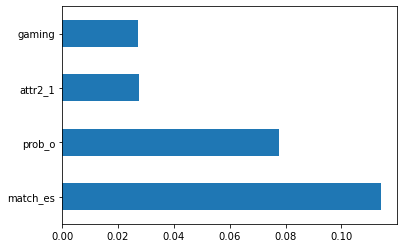

In [13]:
(pd.Series(rfr_.feature_importances_, index=X.columns)
   .nlargest(4)
   .plot(kind='barh'))

In [60]:
{name: score
    for name, score
        in zip(X_train.columns, rfr_.feature_importances_)}

{'wave': 0.010511408336227475,
 'int_corr': 0.007863012892784876,
 'samerace': 0.0041258123649474095,
 'age_o': 0.01269621523194612,
 'race_o': 0.019428174736349623,
 'pf_o_att': 0.013811803890167756,
 'pf_o_sin': 0.02000749156765316,
 'pf_o_int': 0.0074691897894763335,
 'pf_o_fun': 0.018036978062245496,
 'pf_o_amb': 0.01190553320045315,
 'pf_o_sha': 0.026160157871267867,
 'attr_o': 0.019404768623021026,
 'sinc_o': 0.022220022868562044,
 'intel_o': 0.015112218633490928,
 'fun_o': 0.007449434256640364,
 'amb_o': 0.010229942716480724,
 'shar_o': 0.010475096078305953,
 'like_o': 0.005037706207874316,
 'prob_o': 0.0776544673014079,
 'met_o': 0.0010235664811002485,
 'age': 0.010564287691958718,
 'field_cd': 0.009945611623028768,
 'race': 0.009578872381394807,
 'imprace': 0.024373108952672074,
 'imprelig': 0.013271007980820215,
 'goal': 0.005390921614490333,
 'date': 0.008825763884265276,
 'go_out': 0.0058219554243878835,
 'sports': 0.012683960744271259,
 'tvsports': 0.011116184478547286,
 '

In [59]:
list(zip(X_train.columns, points))

[('wave', (0, 0.010511408336227475)),
 ('int_corr', (1, 0.007863012892784876)),
 ('samerace', (2, 0.0041258123649474095)),
 ('age_o', (3, 0.01269621523194612)),
 ('race_o', (4, 0.019428174736349623)),
 ('pf_o_att', (5, 0.013811803890167756)),
 ('pf_o_sin', (6, 0.02000749156765316)),
 ('pf_o_int', (7, 0.0074691897894763335)),
 ('pf_o_fun', (8, 0.018036978062245496)),
 ('pf_o_amb', (9, 0.01190553320045315)),
 ('pf_o_sha', (10, 0.026160157871267867)),
 ('attr_o', (11, 0.019404768623021026)),
 ('sinc_o', (12, 0.022220022868562044)),
 ('intel_o', (13, 0.015112218633490928)),
 ('fun_o', (14, 0.007449434256640364)),
 ('amb_o', (15, 0.010229942716480724)),
 ('shar_o', (16, 0.010475096078305953)),
 ('like_o', (17, 0.005037706207874316)),
 ('prob_o', (18, 0.0776544673014079)),
 ('met_o', (19, 0.0010235664811002485)),
 ('age', (20, 0.010564287691958718)),
 ('field_cd', (21, 0.009945611623028768)),
 ('race', (22, 0.009578872381394807)),
 ('imprace', (23, 0.024373108952672074)),
 ('imprelig', (24, 

In [35]:
points = list(enumerate(rfr_.feature_importances_))

In [50]:
points[70]

(70, 0.11412619347640231)

Text(70, 0.11412619347640231, 'the point')

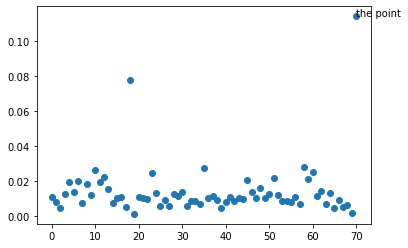

In [51]:
plt.scatter(x = [x for x, y  in points],
            y = [y for x, y in points])
plt.annotate('the point',
             points[70])

In [1086]:
xg_pipe = Pipeline([
        ('std_scaler', StandardScaler()),
        ('xg', xgboost.XGBClassifier())])

xg_grid = {'xg__max_depth': list(range(0, 50, 10))}

xg_gs = GridSearchCV(xg_pipe, param_grid = xg_grid, cv = 5, n_jobs = -1, verbose = 1)
xg_gs.fit(X_train, y_train)

y_train_pred_xg = xg_gs.best_estimator_.predict(X_train)
y_test_pred_xg = xg_gs.best_estimator_.predict(X_test)
model_add_score('xg', y_train, y_train_pred_xg, y_test, y_test_pred_xg)
xg_gs.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'xg__max_depth': 30}

In [522]:
models_df

,name,accuracy_train,accuracy_test,recall_train,recall_test,f1_score_train,f1_score_test
0,knn,1.00,0.74,1.00,0.66,1.00,0.69
1,dtc,0.84,0.75,0.87,0.77,0.83,0.73
2,rfr,0.88,0.79,0.89,0.80,0.86,0.77


In [902]:
log_imbalance_df

,name,accuracy_train,accuracy_test,recall_train,recall_test,f1_score_train,f1_score_test
0,base_model,0.78,0.74,0.80,0.76,0.76,0.73
1,base_model,0.78,0.74,0.80,0.76,0.76,0.73
2,base_model,0.77,0.77,0.79,0.79,0.75,0.75
3,base_model,0.77,0.76,0.78,0.78,0.75,0.74
4,base_modelnoamb,0.77,0.76,0.78,0.78,0.75,0.74
5,base_modelnoamb,0.77,0.76,0.79,0.75,0.75,0.73
6,base_modelnoamb,0.77,0.75,0.79,0.75,0.75,0.73
7,base_model_noconvo,0.64,0.64,0.63,0.62,0.60,0.60
8,base_modelwpartner,0.77,0.75,0.78,0.75,0.75,0.73
9,base_modelwinitialsurvey,0.77,0.75,0.78,0.75,0.75,0.73


In [1142]:
models_df

,name,accuracy_train,accuracy_test,recall_train,recall_test,f1_score_train,f1_score_test
0,knn_,0.71,0.67,0.54,0.47,0.61,0.55
1,dtc,0.75,0.63,0.72,0.58,0.71,0.58
2,rfr_update,0.84,0.69,0.83,0.64,0.81,0.64
3,xg,1.00,0.69,1.00,0.57,1.00,0.61
